In [1]:
'''
Classification using KNN
Deals with classifying data based on similar characteristics or nearest neighbors.
Nearest neighbor classifiers are defined by their characterstics of classifying unlabeled examples by assigning them the class of the most similar labeled examples.
KNN is used when data is numerous and hard to understand.
'''

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing

In [3]:
os.chdir("C:/Users/ASUS/Desktop/Python Course/Datasets")
data=pd.read_csv("diabetes.csv")

In [4]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diabetes
0,6,148,72,35,0,33.6,0.627,50,pos
1,1,85,66,29,0,26.6,0.351,31,neg
2,8,183,64,0,0,23.3,0.672,32,pos
3,1,89,66,23,94,28.1,0.167,21,neg
4,0,137,40,35,168,43.1,2.288,33,pos
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,neg
764,2,122,70,27,0,36.8,0.340,27,neg
765,5,121,72,23,112,26.2,0.245,30,neg
766,1,126,60,0,0,30.1,0.349,47,pos


In [5]:
#Sometimes its better to "Recode" a variable so that its easier to understand
data['Diabetes'].replace(['pos','neg'],[1,0],inplace=True)
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [6]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diabetes
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [7]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
data = data[~((data < (Q1 - 1.5*IQR))|(data>(Q3+1.5*IQR))).any(axis=1)]
from scipy import stats
z = np.abs(stats.zscore(data))
threshold = 2.5
data = data[(z < threshold).all(axis=1)]
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
762,9,89,62,0,0,22.5,0.142,33,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [8]:
#Diabetes <- Pregnancies +Glucose + BMI
z = data.loc[:,['Pregnancies','Glucose','BMI','Diabetes']]
x = data.loc[:,['Pregnancies','Glucose','BMI']]
z.describe()

,Pregnancies,Glucose,BMI,Diabetes
count,556.000000,556.000000,556.000000,556.000000
mean,3.523381,116.170863,31.693705,0.284173
std,2.959394,26.896290,6.248365,0.451426
min,0.000000,56.000000,18.200000,0.000000
25%,1.000000,97.000000,27.175000,0.000000
50%,3.000000,112.000000,31.600000,0.000000
75%,6.000000,130.000000,35.725000,1.000000
max,11.000000,191.000000,47.900000,1.000000


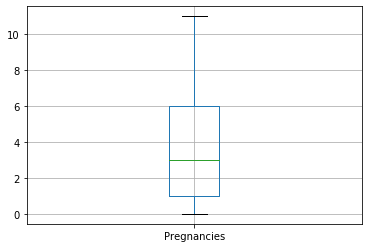

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
data.boxplot(column='Pregnancies')

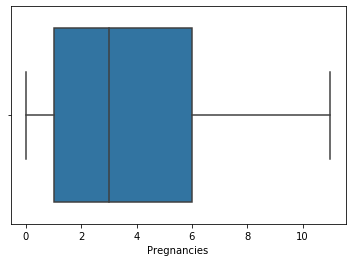

In [10]:
import seaborn as sns
sns.boxplot(x=data['Pregnancies'])

In [11]:
y=data.loc[:,['Diabetes']]

In [12]:
x

,Pregnancies,Glucose,BMI
0,6,148,33.6
1,1,85,26.6
2,8,183,23.3
3,1,89,28.1
5,5,116,25.6
...,...,...,...
762,9,89,22.5
764,2,122,36.8
765,5,121,26.2
766,1,126,30.1


In [13]:
y

,Diabetes
0,1
1,0
2,1
3,0
5,0
...,...
762,0
764,0
765,0
766,1


In [14]:
#minmax scaler = (x-min(x))/(max(x)-min(x))

In [15]:
minmax=preprocessing.MinMaxScaler(feature_range=(0,1))
minmax.fit(x).transform(x)

array([[0.54545455, 0.68148148, 0.51851852],
       [0.09090909, 0.21481481, 0.28282828],
       [0.72727273, 0.94074074, 0.17171717],
       ...,
       [0.45454545, 0.48148148, 0.26936027],
       [0.09090909, 0.51851852, 0.4006734 ],
       [0.09090909, 0.27407407, 0.41077441]])

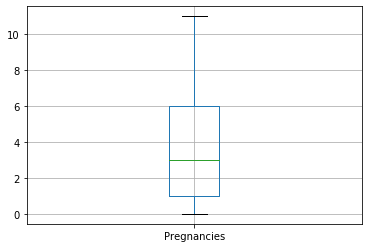

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
x.boxplot(column='Pregnancies')

In [17]:
z.corr()

,Pregnancies,Glucose,BMI,Diabetes
Pregnancies,1.000000,0.169419,0.048070,0.245877
Glucose,0.169419,1.000000,0.175404,0.471610
BMI,0.048070,0.175404,1.000000,0.261323
Diabetes,0.245877,0.471610,0.261323,1.000000


In [18]:
from sklearn import model_selection, neighbors
from sklearn.model_selection import train_test_split
y = y.astype('int')
y

,Diabetes
0,1
1,0
2,1
3,0
5,0
...,...
762,0
764,0
765,0
766,1


In [19]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [20]:
X_train

,Pregnancies,Glucose,BMI
545,8,186,34.5
295,6,151,35.5
664,6,115,33.7
400,4,95,32.0
134,2,96,21.1
...,...,...,...
180,6,87,23.2
505,10,75,33.3
238,9,164,30.8
23,9,119,29.0


In [21]:
y_train = y_train.astype('int')
y_train

,Diabetes
545,1
295,0
664,1
400,1
134,0
...,...
180,0
505,0
238,1
23,1


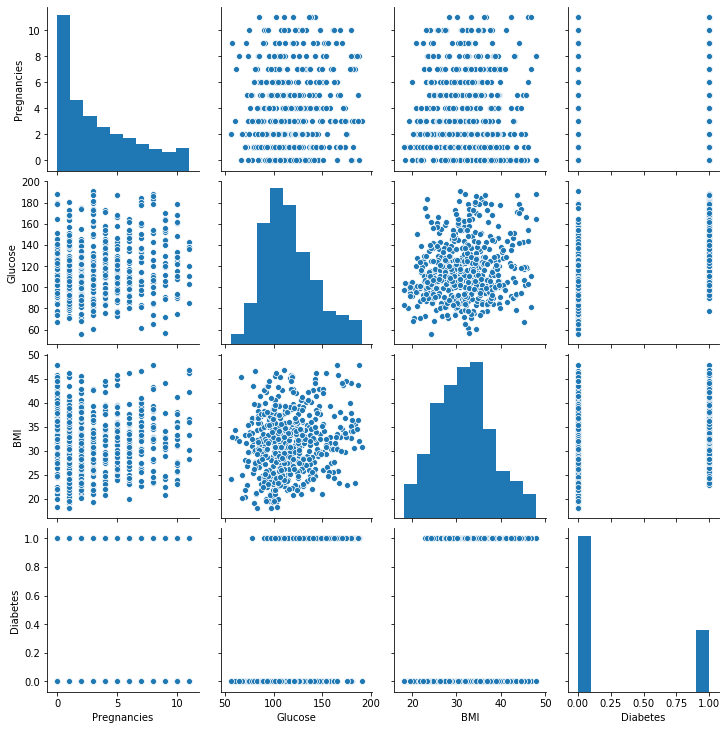

In [22]:
sns.pairplot(z)

In [23]:
clf = neighbors.KNeighborsClassifier()
clf.fit(X_train,y_train)

C:\Users\ASUS\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [24]:
y_pred=clf.predict(X_test)

In [25]:
accuracy = clf.score(X_test, y_test)

In [26]:
accuracy

0.7321428571428571

In [27]:
probs = clf.predict_proba(X_test)

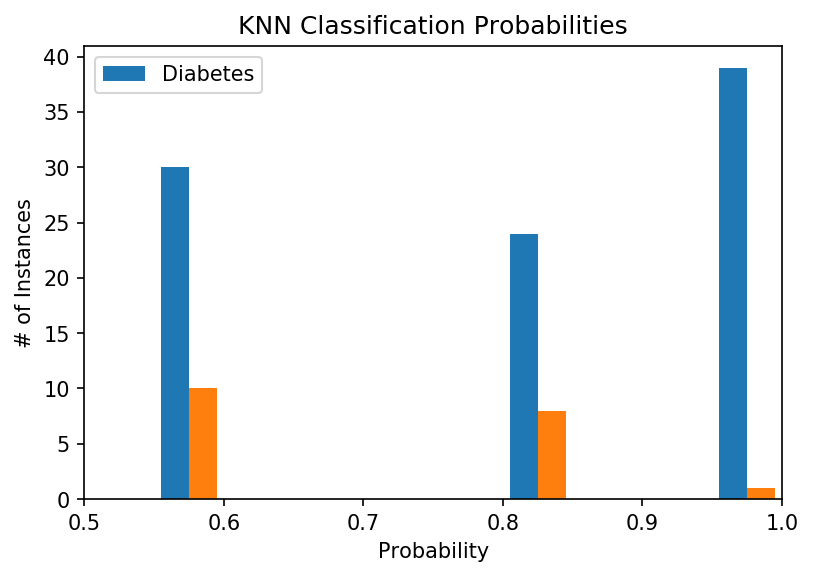

In [28]:
plt.figure(dpi=150)
plt.hist(probs,bins=20)
plt.title("KNN Classification Probabilities")
plt.xlabel('Probability')
plt.ylabel('# of Instances')
plt.xlim([0.5,1])
plt.legend(y_test)
plt.show()

In [29]:
import sklearn.metrics as metrics

#calculate the fpr and tpr for all thresholds of the classification
probs = clf.predict_proba(X_test)
preds = probs[:,1]
fpr,tpr,threshold=metrics.roc_curve(y_test,preds)
roc_auc=metrics.auc(fpr,tpr)

#Accuracy score on Test and Train
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix

print("\nAccuracy score: %f" %(accuracy_score(y_test, preds.round())*100))
print("Recall score: %f" %(recall_score(y_test, preds.round())*100))
print("ROC score: %f" %(roc_auc_score(y_test, preds.round())*100))
print(confusion_matrix(y_test,preds.round()))
from sklearn.metrics import precision_score
knn_precision_test=precision_score(y_test,preds.round(),average='weighted')
knn_precision_test


Accuracy score: 73.214286
Recall score: 29.629630
ROC score: 58.344227
[[74 11]
 [19  8]]


0.7053824076319831

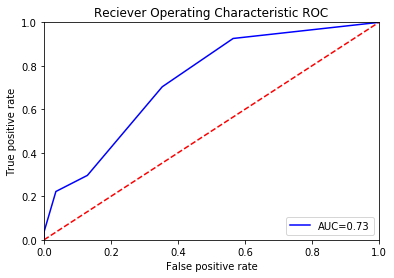

In [30]:
plt.title('Reciever Operating Characteristic ROC')
plt.plot(fpr,tpr,'b',label='AUC=%0.2f'%roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.show()

# LOGISTIC REGRESSION

In [31]:
#Y=a+b1x1+b2x2+....+bnXn
#P=segmoid(Y)
from sklearn.linear_model.logistic import LogisticRegression
cls = LogisticRegression(random_state=0)
lr_cls=cls.fit(X_train,y_train)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.linear_model.logistic module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.linear_model. Anything that cannot be imported from sklearn.linear_model is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [32]:
lr_y_test=lr_cls.predict(X_test)
lr_y_test

array([0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1])

In [33]:
print("Actual Diabestes: ")
print(y_test.values)

Actual Diabestes: 
[[0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]]


In [34]:
lr_y_train=lr_cls.predict(X_train)
lr_y_train

array([1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,

In [35]:
print("Actual Diabetes: ")
print(y_train.values)

Actual Diabetes: 
[[1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [

In [36]:
#Accuracy score on Test and Train
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix

print("\nAccuracy score: %f" %(accuracy_score(y_test, lr_y_test)*100))
print("Recall score: %f" %(recall_score(y_test, lr_y_test)*100))
print("ROC score: %f" %(roc_auc_score(y_test, lr_y_test)*100))
print(confusion_matrix(y_test,lr_y_test))


Accuracy score: 79.464286
Recall score: 40.740741
ROC score: 66.252723
[[78  7]
 [16 11]]


In [37]:
from sklearn.model_selection import train_test_split
X=data[['Pregnancies','Glucose','BMI']]
y=data['Diabetes']
X_train,X_test,y_train,y_test, = train_test_split(X,y,test_size=0.2,random_state=42)

In [38]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_std=scaler.fit_transform(X_train)
X_test_std=scaler.transform(X_test)
from sklearn.model_selection import cross_val_score,cross_val_predict
lr_acc=cross_val_score(lr_cls,X_train_std,y_train,cv=3, scoring='accuracy',n_jobs=-1)
lr_proba=cross_val_predict(lr_cls,X_train_std,y_train,cv=3, method='predict_proba')
lr_scores=lr_proba[:,1]

In [39]:
lr_acc

array([0.78378378, 0.77702703, 0.7972973 ])

In [40]:
lr_accu_train=accuracy_score(y_train,lr_y_train)
lr_accu_train

0.5878378378378378

In [41]:
import sklearn.metrics as metrics
def ROC_curve (title, y_train,scores,label=None):
    fpr,tpr,thresholds=metrics.roc_curve(y_train,scores)
    print('AUC Score ', title, roc_auc_score(y_train,scores))
    plt.figure(figsize=(8,6))
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.plot(fpr,tpr,'b',label='AUC=%0.2f'%roc_auc)
    plt.xlabel('False positive rate', fontsize=16)
    plt.ylabel('True positive rate', fontsize=16)
    plt.title('ROC Curve: {}'.format(title),fontsize=16)
    plt.show
    

AUC Score  logistic regression 0.8283540228763749


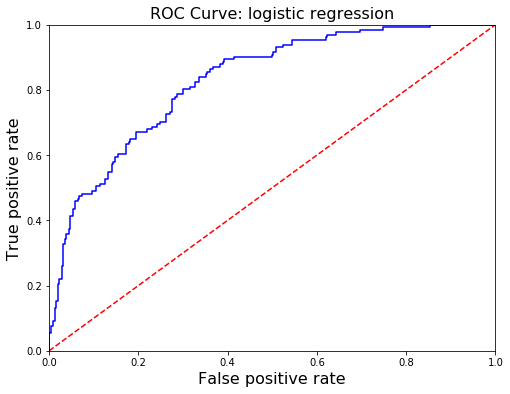

In [42]:
ROC_curve('logistic regression',y_train,lr_scores)

In [43]:
from sklearn.metrics import precision_score
lr_precision_test=precision_score(y_test,lr_y_test,average='weighted')
lr_precision_test

0.6053381458966565

In [44]:
lr_precision_train=precision_score(y_train,lr_y_train,average='weighted')
lr_precision_train

0.5467940457750241

# SVM Classification

In [45]:
from sklearn.svm import SVC
sc=SVC(kernel='rbf')
sc_classifier=sc.fit(X_train,y_train)

In [46]:
svc_y_test=sc_classifier.predict(X_test)
print(svc_y_test)

[0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0
 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0]


In [47]:
svc_y_train=sc_classifier.predict(X_train)
print(svc_y_train)

[0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0
 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]


In [48]:
from sklearn.metrics import confusion_matrix
svc_cm_test=confusion_matrix(y_test,svc_y_test)
svc_cm_test

array([[82,  3],
       [15, 12]], dtype=int64)

In [49]:
svc_cm_train=confusion_matrix(y_train,svc_y_train)
svc_cm_train

array([[298,  15],
       [ 86,  45]], dtype=int64)

In [50]:
from sklearn.metrics import accuracy_score
svc_acc_test=accuracy_score(y_test,svc_y_test)
svc_acc_test

0.8392857142857143

In [51]:
svc_acc_train=accuracy_score(y_train,svc_y_train)
svc_acc_train

0.7725225225225225

In [52]:
from sklearn.metrics import precision_score
sv_precision_test = precision_score(y_test,svc_y_test,average='weighted')
sv_precision_test
from sklearn.model_selection import cross_val_score,cross_val_predict
svm_acc=cross_val_score(sc_classifier,X_train_std,y_train,cv=3, scoring='accuracy',n_jobs=-1)
svm_proba=cross_val_predict(sc_classifier,X_train_std,y_train,cv=3)
svm_scores=lr_proba[:,1]

In [53]:
sv_precision_train = precision_score(y_train,svc_y_train,average='weighted')
sv_precision_train

0.7683582019519518

AUC Score  SVM 0.8283540228763749


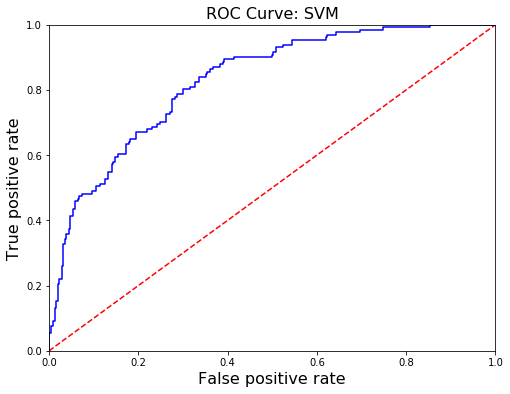

In [55]:
roc_auc=metrics.auc(fpr,tpr)
ROC_curve('SVM',y_train,svm_scores)

In [57]:
print("Recall score: %f" %(recall_score(y_test,svc_y_test )*100))

Recall score: 44.444444
